# COMPUTATIONAL SOCIAL NETWORK ANALYSIS
## Moses Boudourides

# II. Adjacency and Connectivity

<span style="color:green">
    
### [1. Neighbors](#1)

### [2. Degrees](#2)

### [3. Adjacency Matrices](#3)

### [4. Subgraphs](#4)

### [5. Paths and Distances](#5)

### [6. Connectedness](#6)

</span>

In [1]:
# The modules (libraries) of Python which are used in this notebook:

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import matplotlib.colors
from collections import Counter, defaultdict
import random, math
import numpy as np
import scipy as sp
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from pylab import hist
from IPython.core.display import Image, display

<a id='1'></a>
## <span style="color:green">1. Neighbors</span>

#### Undirected Graphs

Let $G = (V,E)$ be an undirected graph, where $V$ denotes the **set of nodes** (or **vertices**) and $E$ the **set of edges** (or **links**) of graph $G$. 

Every edge is a pair of two nodes: for instance, edge $e ∈ E$, denoted as $e = (u,v)$, is formed by joining the nodes $u, v ∈ V$. $u, v$ are called **end points** of the edge $e$. 

In general, in a graph $G = (V,E)$ two nodes $u, v ∈ V$ are called **adjacent** to each other if they are the end points of an edge $e \in E$ (apparently, $e = (u,v)$).

In an undirected graph, if $u ∈ V$ is a node, another node $v ∈ V$ is a **neighbor** of $u$ if there is an edge $(u,v) ∈ E$ (in other words, if $v$ is adjacent to $u$). 

The subset of $V$ composed of all neighbors of node $u$ is denoted as $N(u)$ and it is called **neighborhood** of $u$. 

Notice that node $u$ does **not** belong to its neighborhood.

If $u$ has no neighbors (i.e., $N(u)$ is empty), node $u$ is called **isolated.**

The neighborhood of node 1 is [4, 5, 6, 10, 12]
The isolates of the graph are nodes [7, 9]


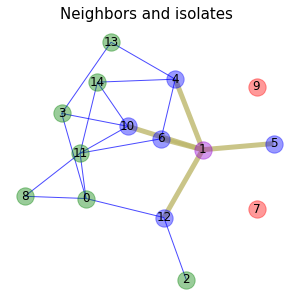

In [2]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        u=random.choice([n for n in G.nodes() if n not in list(nx.isolates(G))])
        if len(list(nx.neighbors(G,u)))>2:
            break

print("The neighborhood of node %i is %s" %(u,list(nx.neighbors(G,u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(nx.neighbors(G,u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if u in e]
Y2=[e for e in G.edges if e not in Y1]

name="Neighbors and isolates"
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

The neighborhood of node Medici is ['Acciaiuoli', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati']
The isolates of the graph are nodes []


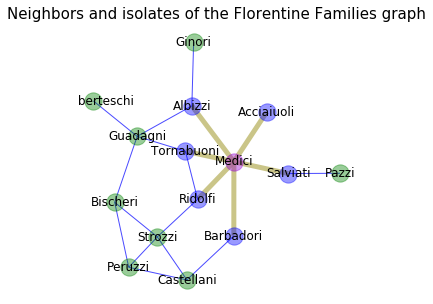

In [3]:
name1 = "Florentine Families"
G = nx.florentine_families_graph()

u=random.choice([n for n in G.nodes()])
u="Medici"
list(nx.neighbors(G,u))
print("The neighborhood of node %s is %s" %(u,list(nx.neighbors(G,u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(nx.neighbors(G,u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if u in e]
Y2=[e for e in G.edges if e not in Y1]

name="Neighbors and isolates of the %s graph" %name1
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

#### Directed Graphs

Let $G = (V,E)$ be a directed graph, where $V$ denotes the **set of nodes** (or **vertices**) and $E$ the **set of edges** (or **links**) of graph $G$. 

If $u ∈ V$ is a node, another node $v ∈ V$ is an **out-neighbor** or **in-neighbor** of $u$ if there is an edge $(u,v) ∈ E$ or $(v,u) ∈ E$, respectively. 

The subset of $V$ composed of all out-neighbors or in-neighbors of node $u$ is denoted as $N_{out}(u)$ or $N_{in}(u)$ and it is called **out-neighborhood** or **in-neighborhood**, respectively, of $u$. 

Notice that node $u$ does **not** belong to either its out-neighborhood or in-neighborhood.

If $u$ has no neighbors (i.e., both $N_{out}(u)$ and $N_{in}(u)$ are empty), node $u$ is called **isolated.**

The out-neighborhood of node 3 is [2, 5, 7, 8]
The isolates of the graph are nodes [0, 11]


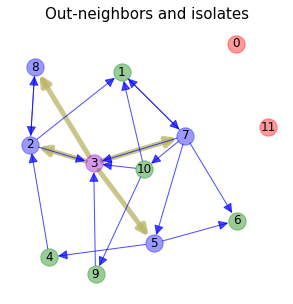

In [4]:
while True:
    G=nx.erdos_renyi_graph(12,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        u=random.choice([n for n in G.nodes() if n not in list(nx.isolates(G))])
        if len(list(G.successors(u)))>3:
            break

print("The out-neighborhood of node %i is %s" %(u,list(G.successors(u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(G.successors(u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if e[0]==u]
Y2=[e for e in G.edges if e not in Y1]

name="Out-neighbors and isolates"
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

The in-neighborhood of node 0 is [1, 3, 4, 5, 6, 8]
The isolates of the graph are nodes [2, 7]


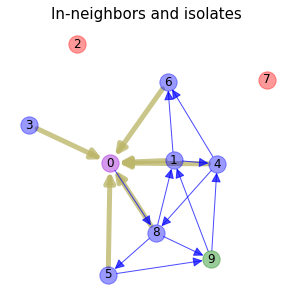

In [5]:
while True:
    G=nx.erdos_renyi_graph(10,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        u=random.choice([n for n in G.nodes() if n not in list(nx.isolates(G))])
        if len(list(G.predecessors(u)))>5:
            break

print("The in-neighborhood of node %i is %s" %(u,list(G.predecessors(u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(G.predecessors(u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if e[1]==u]
Y2=[e for e in G.edges if e not in Y1]

name="In-neighbors and isolates"
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

<a id='2'></a>
## <span style="color:green">2. Degrees</span>

#### Undirected Graphs

The **degree** of a node of an undirected graph is equal to the number of neighbors of the node.

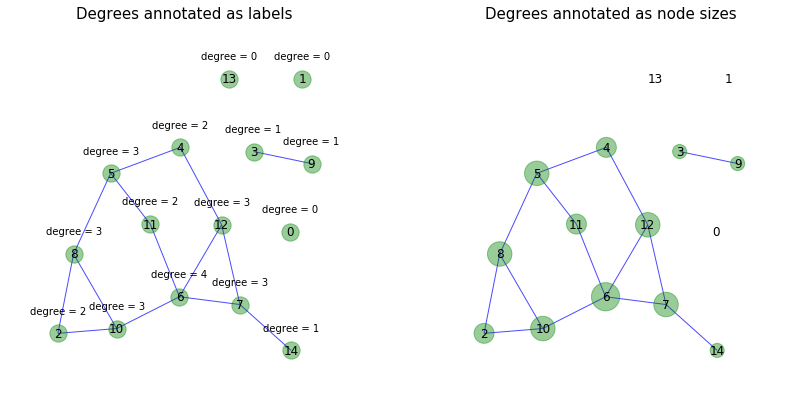

In [6]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

nx.set_node_attributes(G, dict(G.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as node sizes"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

#### Directed Graphs

The **out-degree** of a node of an directed graph is equal to the number of out-neighbors of the node.

The **in-degree** of a node of an directed graph is equal to the number of in-neighbors of the node.

The (**total**) **degree** of a node of an directed graph is equal to the sum of its out-degree and in-degree.

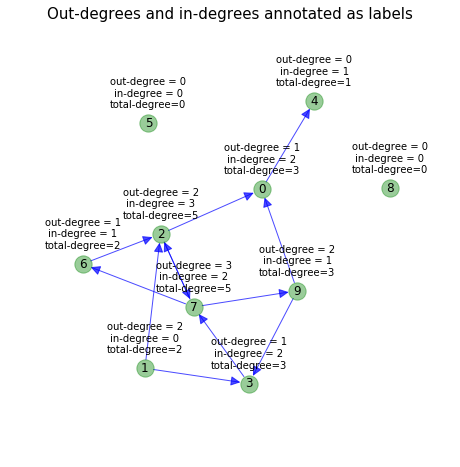

In [7]:
while True:
    G=nx.erdos_renyi_graph(10,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

dd = defaultdict(list)
for d in (dict(G.out_degree), dict(G.in_degree), dict(G.degree)): 
    for key, value in d.items():
        dd[key].append(value)
nx.set_node_attributes(G, dd, 'all degrees')

name="Out-degrees and in-degrees annotated as labels"
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
node_attrs = nx.get_node_attributes(G, 'all degrees')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    att="out-degree = %i\nin-degree = %i\ntotal-degree=%i" %(attr[0],attr[1],attr[2])
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 22)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

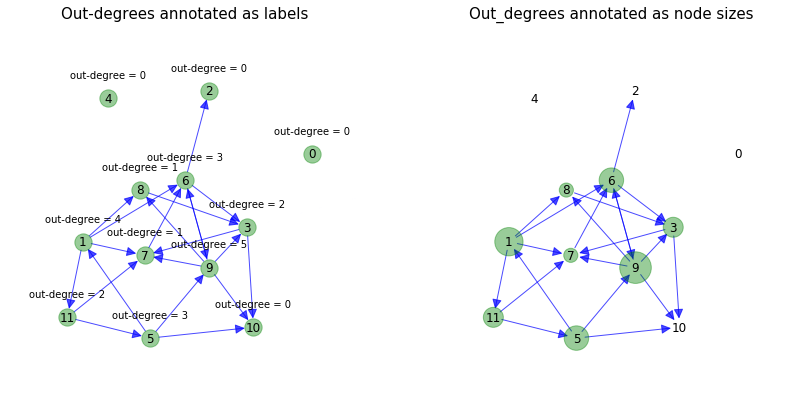

In [8]:
while True:
    G=nx.erdos_renyi_graph(12,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

nx.set_node_attributes(G, dict(G.out_degree), 'out degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Out-degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'out degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="out-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Out_degrees annotated as node sizes"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.out_degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

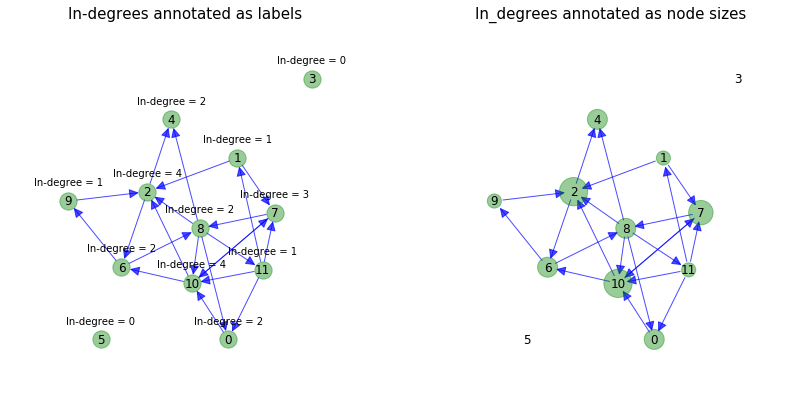

In [9]:
while True:
    G=nx.erdos_renyi_graph(12,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

nx.set_node_attributes(G, dict(G.in_degree), 'in degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="In-degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'in degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="In-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 15)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="In_degrees annotated as node sizes"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.in_degree).values()], node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

## <span style="color:green">Degree Histograms</span>

Node degrees:
{0: 2, 1: 3, 2: 1, 3: 4, 4: 2, 5: 3, 6: 5, 7: 3, 8: 5, 9: 2, 10: 4, 11: 1, 12: 3, 13: 1, 14: 1}
Degree sequence:
[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5]
Frequencies of degree values:
{4: 2, 5: 2, 2: 3, 3: 4, 1: 4}
minimum degree= 1 maximum degree = 5


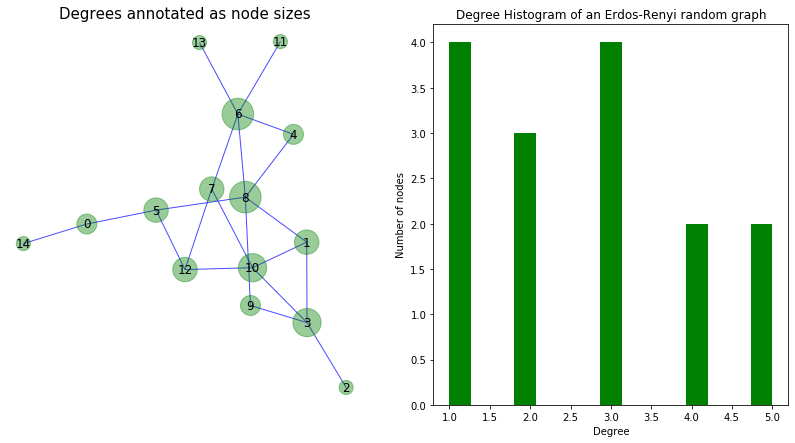

In [10]:
G=nx.erdos_renyi_graph(15,0.2)

ds=dict(G.degree(G.nodes())).values()
print("Node degrees:")
print(dict(G.degree))
print("Degree sequence:")
print(sorted(ds))
print("Frequencies of degree values:")
# print(dict(Counter(ds)))
print(dict(sorted(dict(Counter(ds)).items(), key=lambda item: item[1])))
print("minimum degree=",min(ds),"maximum degree =",max(ds))

plt.figure(figsize=(14,7))
plt.subplot(121)
name="Degrees annotated as node sizes"
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.degree).values()], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
# plt.margins(x=0.2, y=0.2)

plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=len(ds),color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi random graph');

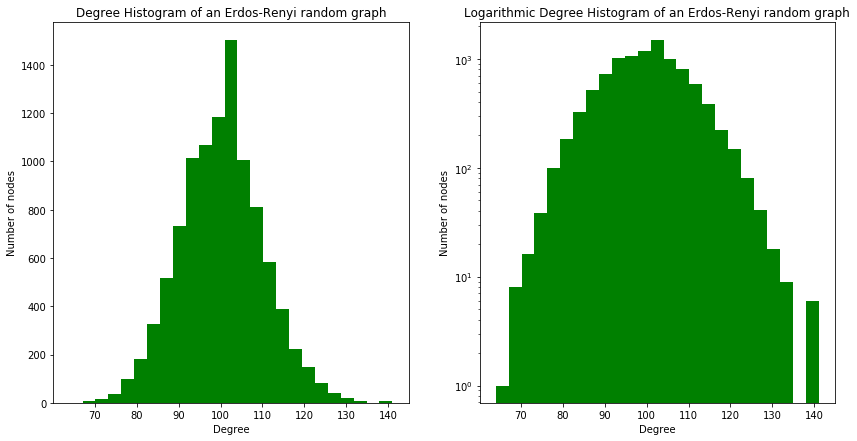

In [11]:
G = nx.erdos_renyi_graph(10000,0.01)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi random graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Logarithmic Degree Histogram of an Erdos-Renyi random graph');

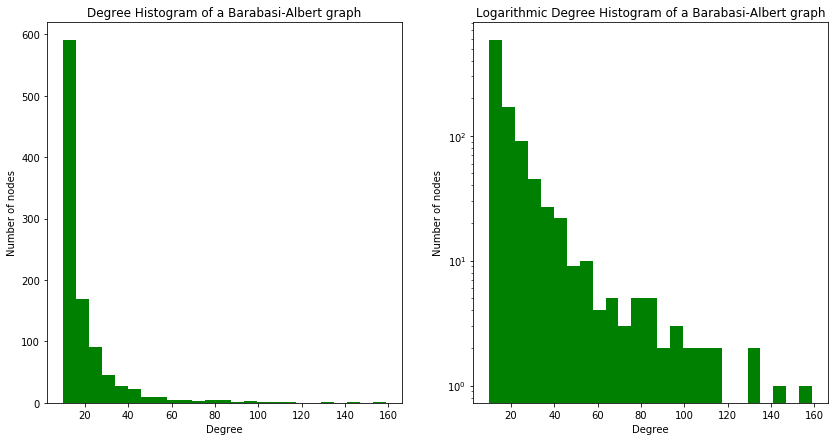

In [12]:
G = nx.barabasi_albert_graph(1000,10)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Barabasi-Albert graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Logarithmic Degree Histogram of a Barabasi-Albert graph');

<a id='3'></a>
## <span style="color:green">3. Adjacency Matrices</span>

Let $G=(V,E)$ be a graph with $n$ vertices and set of vertices $V = \{1, 2, \ldots, n\}$.
Then the **adjacency matrix** of this graph is a $nxn$ matrix $A = \{A_{ij}\}$ such that $A_{ij} = 1$, whenever $(i,j) ∈ E$, while otherwise $A_{ij} = 0$.

Notice that all **diagonal terms** of the adjacency matrix are $0$, unless the graph possesses **self-loops** (which are edges of the form $e = (u,u)$, i.e., possessing the same end point).

If $G$ is undirected, $A$ is a symmetrical matrix. 

If $G$ is directed, $A$ is usually a non-symmetrical matrix, but it can be symmetrical (when all edges are *reciprocated*).

If $G$ is **weighted**, the value of $A_{ij}$ are the the weight of edge $(i,j)$.

*Relationships between adjacency matrix and degrees*:

If $G = (V,E)$ is undirected graph with $n$ nodes, i.e., with $V = \{1, 2, \ldots, n\}$ and $\{A_{ij}\}$ the adjacency matrix of this graph, for node $i ∈ V$, the degree of $i$, denoted as $k_i$, is given by:
$$
k_i = |N(i)| = \sum_{j = 1}^{n} A_{ij}
$$

According to the **handshaking lemma**, the sum of degrees of an undirected graph equals to twice the number of all edges:
$$
\sum_{i = 1}^{n} k_i = \sum_{i = 1}^{n} \sum_{j = 1}^{n} A_{ij} = 2|E|
$$

If $G = (V,E)$ is directed graph with $n$ nodes, i.e., with $V = \{1, 2, \ldots, n\}$ and $\{A_{ij}\}$ the adjacency matrix of this graph, for node $i ∈ V$, the out-degree of $i$ is denoted as $k_i^{out}$, the in-degree of $i$ is denoted as $k_i^{in}$ and the degree of $i$ is denoted as $k_i$:
$$k_{i}^{out} = \sum_{j = 1}^n A_{ji}$$
$$k_{i}^{in} = \sum_{j = 1}^n A_{ij}$$
$$k_i = k_{i}^{out} + k_{i}^{in}$$

#### Undirected Graphs

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


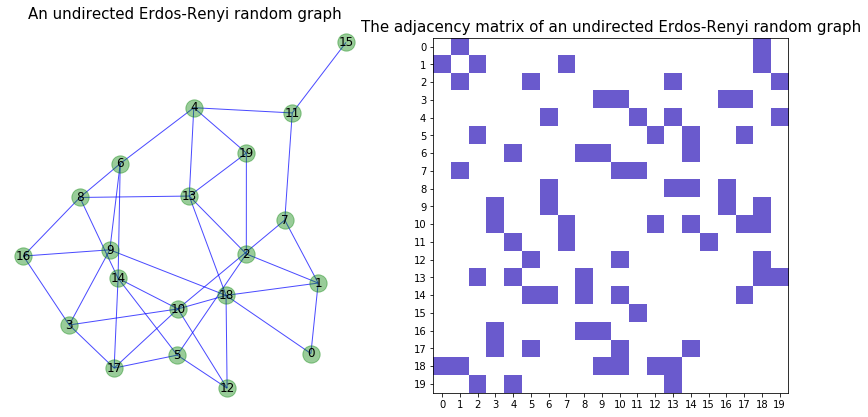

In [13]:
G = nx.erdos_renyi_graph(20,0.2)
name = "undirected Erdos-Renyi random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'slateblue']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


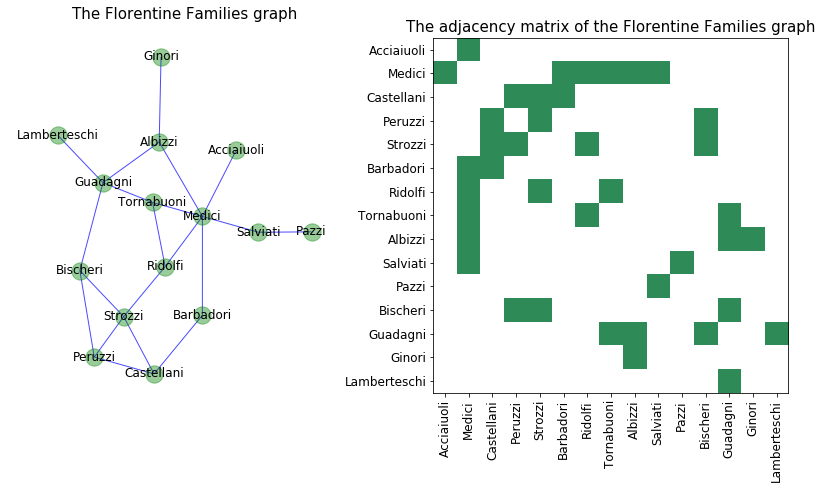

In [14]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_matrix(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=12, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=12);
plt.title("The adjacency matrix of the "+name,fontsize=15);

#### Directed Graphs

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


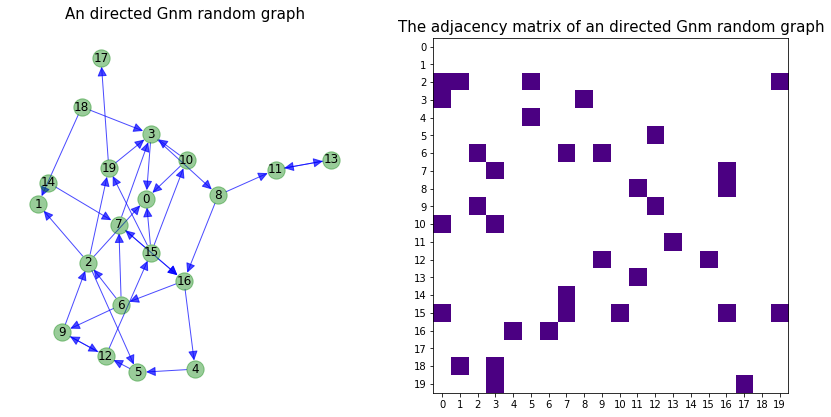

In [15]:
G = nx.gnm_random_graph(n=20, m=35, directed=True)
name = "directed Gnm random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'indigo']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

#### A directed graph with a symmetric adjacency matrix (is always a directed graph with all edges being reciprocated)

[[0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 1 1]
 [1 0 0 0 1 0 1]
 [0 1 0 0 1 1 0]]


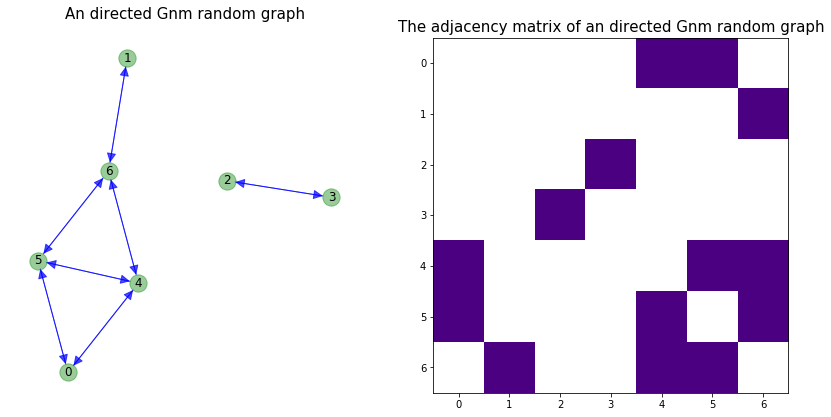

In [16]:
G = nx.gnm_random_graph(n=7, m=10, directed=True)

for e in G.edges():
    if (e[1],e[0]) not in G.edges():
        G.add_edge(*(e[1],e[0]))
        
name = "directed Gnm random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'indigo']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

#### Weighted Graphs

[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 6 0 4 0]
 [0 0 0 0 0 0 0 0 0 6 0 2 0 0 0 2 0 0 0 9]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 5 0 0 1 0]
 [0 0 0 0 0 0 2 0 5 0 0 3 0 0 0 0 1 0 3 0]
 [1 0 0 0 0 0 7 0 0 0 7 9 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 2 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 7 0 0 0 0 0 0 0 0 0 0 0 0 9 4 0]
 [0 0 4 0 0 0 0 0 6 6 0 0 0 0 0 0 1 0 0 9]
 [0 0 0 5 0 0 0 6 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 6 0 0 0 5 0 6 0 0 0 0 0 0 0 5 0 0 4 7]
 [0 0 0 0 7 2 0 0 0 0 0 0 0 0 0 0 9 0 0 0]
 [0 2 0 3 9 0 0 0 0 0 0 0 4 7 0 0 0 1 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 4 0 0 3 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 0 7 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 2 5 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 1 0 0 0 1 0 0 9 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 9 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [4 0 1 3 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 9 0 7 0 0 0 0 0 0 0 0 0 0]]


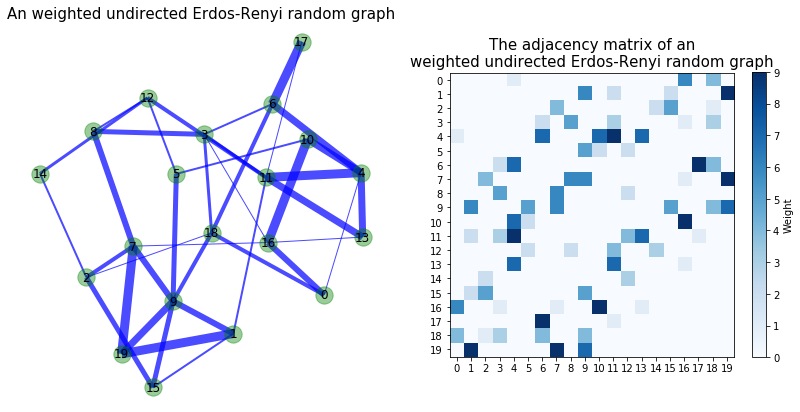

In [17]:
G = nx.erdos_renyi_graph(20,0.2)
name = "weighted undirected Erdos-Renyi random graph"

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
cmap=plt.cm.Blues #PuOr
edge_color=weight_list
vmin = min(edge_color)-1 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm,label="Weight", shrink=0.75) #, orientation='horizontal')
# plt.colorbar(im, cax=cax)
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an\n"+name,fontsize=15);

[[0 0 0 9 0 7 0]
 [0 0 5 0 0 9 0]
 [0 5 0 0 0 0 0]
 [9 0 0 0 8 0 7]
 [0 0 0 8 0 0 0]
 [7 9 0 0 0 0 0]
 [0 0 0 7 0 0 0]]


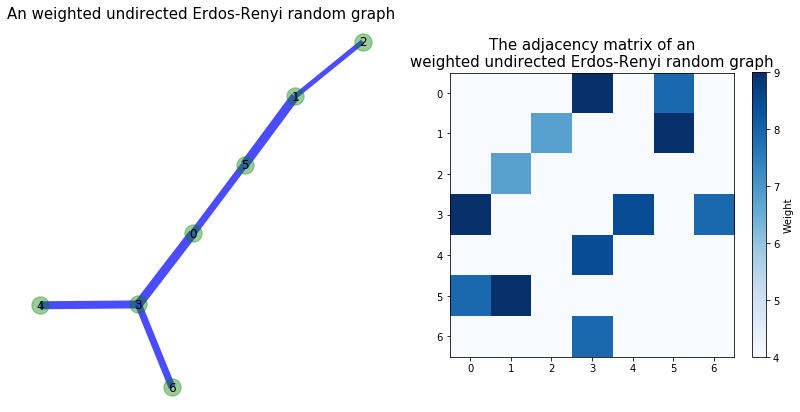

In [18]:
G = nx.erdos_renyi_graph(7,0.2)
name = "weighted undirected Erdos-Renyi random graph"

weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
cmap=plt.cm.Blues #PuOr
edge_color=weight_list
vmin = min(edge_color)-1 
vmax = max(edge_color) 
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm,label="Weight", shrink=0.75) #, orientation='horizontal')
# plt.colorbar(im, cax=cax)
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an\n"+name,fontsize=15);

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 5 0 0 0 0 0 3 0 7 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 2 1 0 0 0 0 5 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 5 0 0 9 0 0 6 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 8 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 4 0 0 0 0 7 0 0 0 1 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 3 0 0 0 0 0 0 0 0 1 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 6 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 4 0 9 1 0 0 0 0 0 9 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0]
 [0 5 0 0 8 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]]


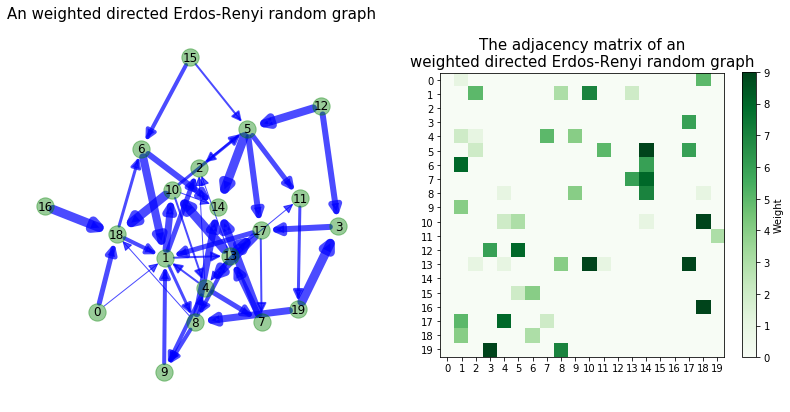

In [19]:
G = nx.erdos_renyi_graph(20,0.1,directed=True)
name = "weighted directed Erdos-Renyi random graph"

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
cmap=plt.cm.Greens
edge_color=weight_list
vmin = min(edge_color)-1
vmax = max(edge_color)
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm,label="Weight", shrink=0.75) #, orientation='horizontal')
# plt.colorbar(im, cax=cax)
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an\n"+name,fontsize=15);

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


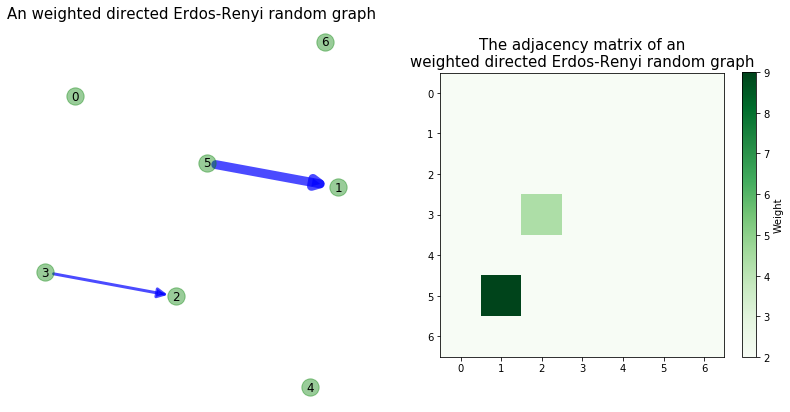

In [20]:
G = nx.erdos_renyi_graph(7,0.1,directed=True)
name = "weighted directed Erdos-Renyi random graph"

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_matrix(G)
cmap=plt.cm.Greens
edge_color=weight_list
vmin = min(edge_color)-1
vmax = max(edge_color)
plt.imshow(adjacency_matrix,cmap=cmap,interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm,label="Weight", shrink=0.75) #, orientation='horizontal')
# plt.colorbar(im, cax=cax)
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an\n"+name,fontsize=15);

<a id='4'></a>
## <span style="color:green">4. Subgraphs</span>

* Let $G = (V,E)$ be a graph and $X$ be a (nontrivial) subset of nodes (i.e., $X \subset V$). Then, the **(induced) subgraph** by $X$ is a graph $G(X) = (X,E(X))$ having set of nodes $X$ and set of edges $E(X)$ consisting of all edges in $E$ with end points in $X$.


* Let $G = (V,E)$ be a graph and $Y$ be a (nontrivial) subset of edges (i.e., $Y \subset E$). Then, the **(induced) subgraph** by $Y$ is a graph $G(Y) = (V(Y),Y)$ having set of edges $Y$ and set of nodes $V(Y)$ consisting of all nodes in $V$ which are end points of edges in $Y$.

### Subgraphs induced by a subset of nodes

Subgraph of ['Albizzi', 'Barbadori', 'Bischeri', 'Castellani', 'Medici', 'Pazzi', 'Peruzzi', 'Ridolfi', 'Strozzi', 'Tornabuoni']


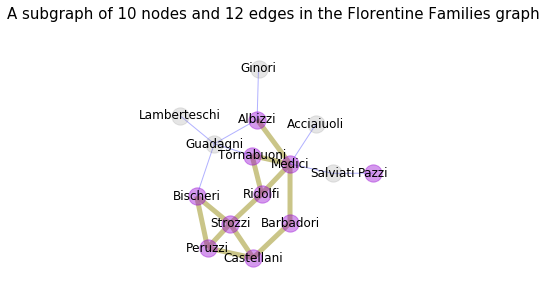

In [21]:
G=nx.florentine_families_graph() 

X=sorted(random.sample(G.nodes(),10))
print("Subgraph of",X)

GX=G.subgraph(X)
# print(X==sorted(GX.nodes()))
# print("Subgraph isolates:",list(nx.isolates(GX)))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in the Florentine Families graph" %(len(X),len(eX))
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

Subgraph of [1, 6, 8, 9, 11, 12, 13]


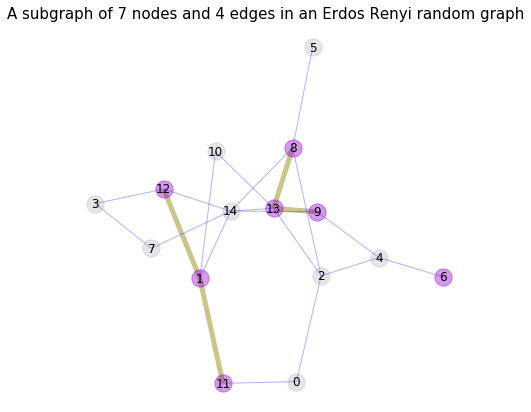

In [22]:
while True:
    G=nx.erdos_renyi_graph(15,0.15)
    X=sorted(random.sample(G.nodes(),5))
    GX=G.subgraph(X)
    if nx.is_connected(GX)==True:
        G.remove_nodes_from(list(nx.isolates(G)))
        break
        
X=sorted(random.sample(G.nodes(),7))
print("Subgraph of",X)

GX=G.subgraph(X)
# print(X==sorted(GX.nodes()))
# print("Subgraph isolates:",list(nx.isolates(GX)))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in an Erdos Renyi random graph" %(len(X),len(eX))
pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
# plt.margins(x=0.2, y=0.2)

Subgraph of [1, 2, 7, 9, 10, 12]


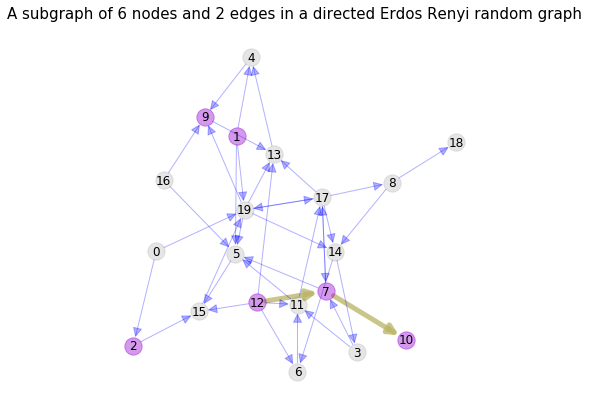

In [23]:
G=nx.erdos_renyi_graph(20,0.1,directed=True)

X=sorted(random.sample(G.nodes(),6))
print("Subgraph of",X)

GX=G.subgraph(X)
# print(X==sorted(GX.nodes()))
# print("Subgraph isolates:",list(nx.isolates(GX)))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in a directed Erdos Renyi random graph" %(len(X),len(eX))
pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
# plt.margins(x=0.2, y=0.2)

Subgraph of [2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22]


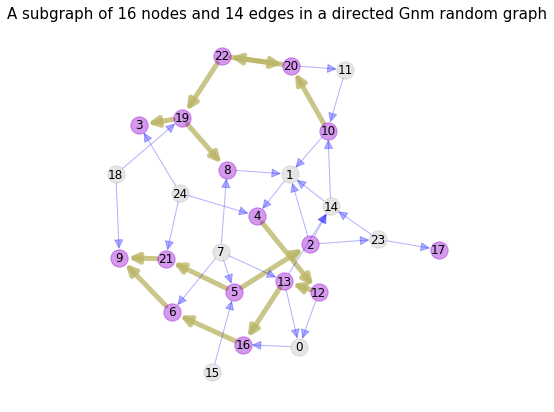

In [24]:
G = nx.gnm_random_graph(25, 40, directed=True)

X=sorted(random.sample(G.nodes(),16))
print("Subgraph of",X)

GX=G.subgraph(X)
# print(X==sorted(GX.nodes()))
# print("Subgraph isolates:",list(nx.isolates(GX)))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in a directed Gnm random graph" %(len(X),len(eX))
pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
# plt.margins(x=0.2, y=0.2)

### Subgraphs induced by a subset of edges

Subgraph of [('Medici', 'Barbadori'), ('Medici', 'Albizzi'), ('Acciaiuoli', 'Medici'), ('Castellani', 'Strozzi'), ('Tornabuoni', 'Guadagni'), ('Castellani', 'Barbadori')]


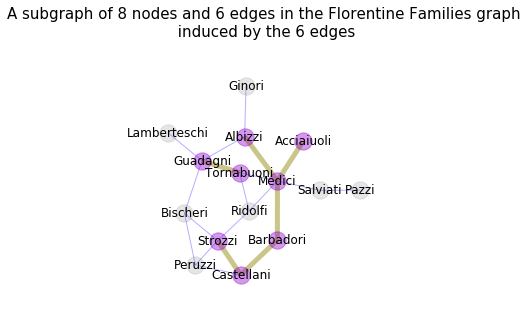

In [25]:
G=nx.florentine_families_graph() 

Y=random.sample(G.edges(),6)
print("Subgraph of",Y)

GY=G.subgraph(Y)

cY=[e for e in G.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in G.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in the Florentine Families graph\n induced by the %i edges" %(len(nY),len(Y),len(Y))
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cnY,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=cY,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

Subgraph of [(8, 6), (0, 13), (13, 4), (8, 15), (2, 18), (11, 10)]


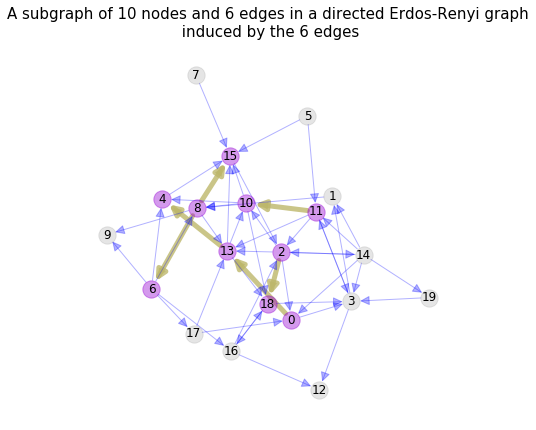

In [26]:
G=nx.erdos_renyi_graph(20,0.1,directed=True)

Y=random.sample(G.edges(),6)
print("Subgraph of",Y)

GY=G.subgraph(Y)

cY=[e for e in G.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in G.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in a directed Erdos-Renyi graph\n induced by the %i edges" %(len(nY),len(Y),len(Y))
pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cnY,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=cY,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

<a id='5'></a>
## <span style="color:green">5. Paths and Distances</span>

* In a graph, given a sequence of distinct nodes $v_1, v_2, \ldots, v_k$ (with $k \geq 2$) such that 
$(v_1,v_2), (v_2,v_3), \ldots, (v_{k-1},v_k)$ are all edges, then this sequence of edges is said to be a **path** in the graph (starting) from node $v_1$ (and ending) to node $v_k$. 


* In a directed graph, a **directed path** is again a sequence of edges, which connects a sequence of nodes, but with the added restriction that all the edges have the same direction. 


* Given two nodes $u, v$ in a graph, $u$ is said to **access** $v$ (or $v$ to be **reachable** by $u$) if there there exists a path from $u$ to $v$ in the graph. 


* In a graph, the **length** of a path is the number of edges in the path (as a sequence of edges connecting a sequence of nodes). 


* A path between two nodes $u$ and $v$ is called **geodesic** if it has the minimum length among all possible paths between these nodes. 


* In a graph, the **distance** $d(u,v)$ between two nodes $u$ and $v$ is the length of the geodesic path between these nodes. Notice that, if the graph is directed, then the distance between two nodes is the length of the geodesic *directed* path between them.


* In a graph $G = (V,E)$, the **average shortest path length (a.s.p.l.)** $a$ is the average value among all (geodesic) distances between the nodes of every pair of nodes in the graph, i.e.:

$$a = \frac{1}{n(n-1)} \sum_{u, v ∈ V} d(u,v)$$


* The **diameter** of a graph is the greatest distance between any pair of nodes.

#### Undirected Graphs

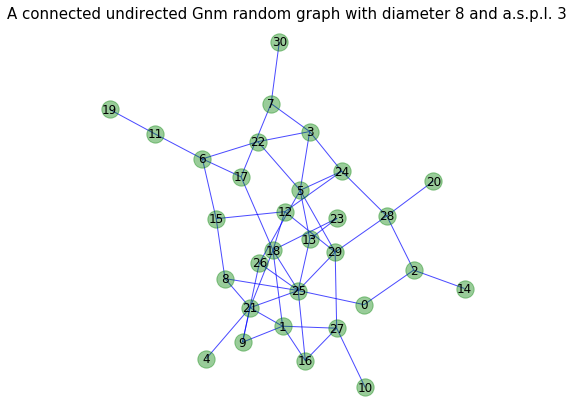

In [27]:
while True:
    n=random.randint(20,31)
    m=random.randint(50,61)
    G = nx.gnm_random_graph(n, m)
    if nx.is_connected(G)==True and nx.diameter(G)>7:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A connected undirected Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

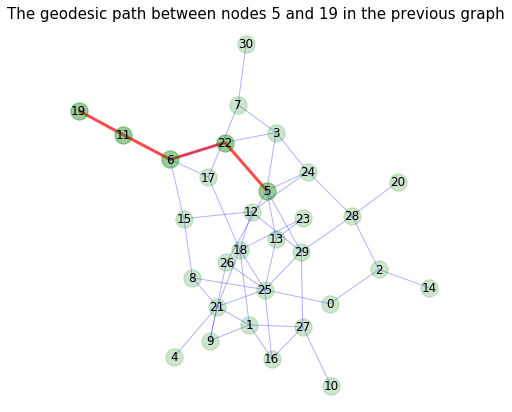

In [28]:
threshold=5 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>=threshold:
        break

gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path between nodes %i and %i in the previous graph" %(source,target)
plt.title(name,fontsize=15);

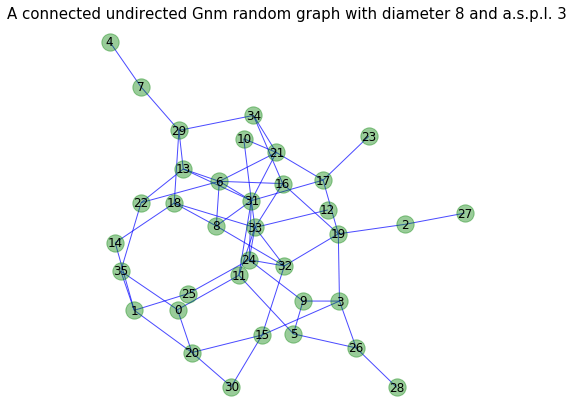

In [29]:
while True:
    n=random.randint(25,36)
    m=random.randint(60,71)
    G = nx.gnm_random_graph(n, m)
    if nx.is_connected(G)==True and nx.diameter(G)>7:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A connected undirected Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

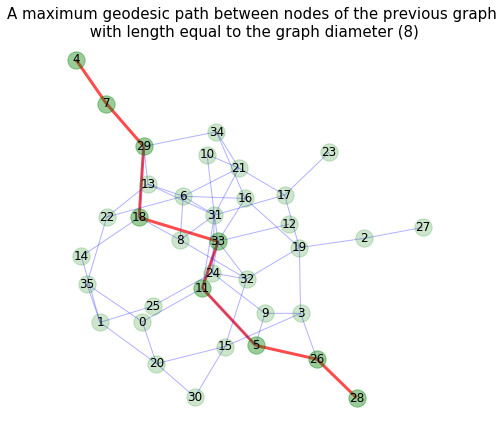

In [30]:
ndiam=[]
dd={}
for source in G.nodes():
    for target in G.nodes():
        if target!=source:
            gp=nx.dijkstra_path(G, source, target)
            dd[(source,target)]=gp #len(gp)-1
for k,v in dd.items():
    if len(v)-1==nx.diameter(G):
        ndiam.append(v)
gp=random.choice(ndiam)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A maximum geodesic path between nodes of the previous graph\n with length equal to the graph diameter (%i)" %nx.diameter(G) 
plt.title(name,fontsize=15);

#### Directed Graphs

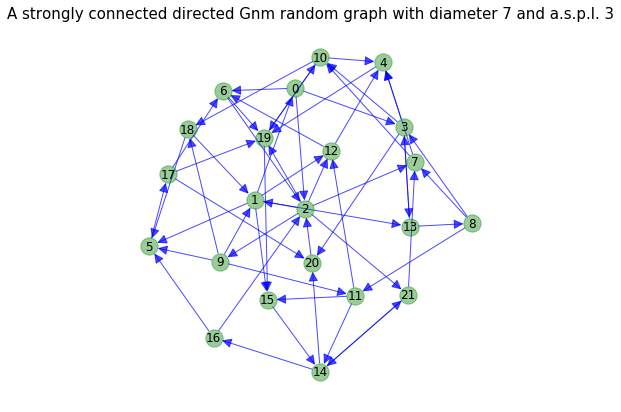

In [31]:
while True:
    n=random.randint(20,31)
    m=random.randint(50,61)
    G = nx.gnm_random_graph(n, m,directed=True)
    if nx.is_strongly_connected(G)==True and nx.diameter(G)>6 and nx.diameter(G)<9:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A strongly connected directed Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

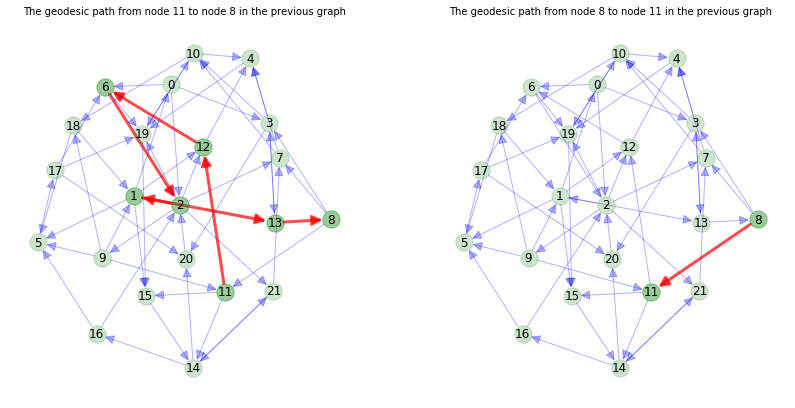

In [32]:
threshold=5 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>threshold:
        break
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph"  %(source,target)
plt.title(name,fontsize=10);

plt.subplot(122)
gp=nx.dijkstra_path(G, source=target, target=source)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph" %(target,source)
plt.title(name,fontsize=10);

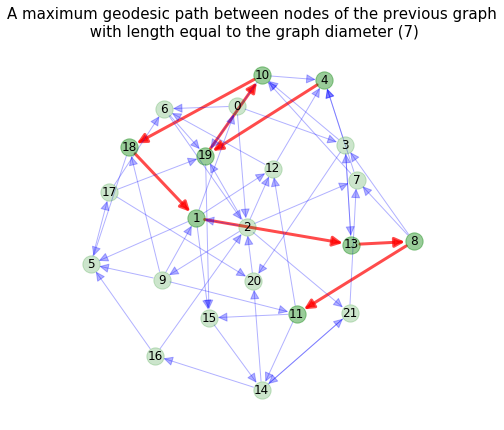

In [33]:
ndiam=[]
dd={}
for source in G.nodes():
    for target in G.nodes():
        if target!=source:
            gp=nx.dijkstra_path(G, source, target)
            dd[(source,target)]=gp #len(gp)-1
for k,v in dd.items():
    if len(v)-1==nx.diameter(G):
        ndiam.append(v)
gp=random.choice(ndiam)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A maximum geodesic path between nodes of the previous graph\n with length equal to the graph diameter (%i)" %nx.diameter(G) 
plt.title(name,fontsize=15);

In [34]:
# ndiam=[x for x in ndiam if x!=gp]
# gp=random.choice(ndiam)
# gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
# ngpe=[e for e in G.edges() if e not in gpe]
# ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
# nng=[n for n in G.nodes() if n not in ng]

# plt.figure(figsize=(7,7))
# pos=graphviz_layout(G)
# nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
# nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
# nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=gpe,edge_color="r",width=3, alpha=0.7)
# nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ngpe,edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');
# name="A maximum geodesic path between nodes of the previous graph\n with length equal to the graph diameter (%i)" %nx.diameter(G) 
# plt.title(name,fontsize=15);

<a id='6'></a>
## <span style="color:green">6. Connectedness</span>

* An undirected graph is **connected** when there is a path between any pair of nodes. A graph that is not connected is **disconnected**. 


* A directed graph is called **strongly connected** if, for every pair of nodes $u, v$, it contains a directed path from $u$ to $v$ and a directed path from $v$ to $u$.


* A directed graph is called **weakly connected** if replacing all of its directed edges with undirected edges produces a connected (undirected) graph.

### <span style="color:green">Connected Components</span>

* In an undirected graph, a **connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by paths and which is connected to no additional nodes in the rest of the graph. A disconnected undirected graph contains more than one connected components and the **largest connected component** of the graph is that induced subgraph by the largest subset of nodes. Obviously, a connected graph has a single connected component and it coincides with its largest connected component.


* In a directed graph, a **strongly connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by *directed* paths and which is connected (by directed paths) to no additional nodes in the rest of the graph. Oviously, every strongly connected component is a strongly connected (sub)graph. In general, a directed graph may contain more than one strongly connected components and the **largest strongly connected component** of the graph is that induced subgraph by the largest subset of nodes. 


* In a directed graph, a **weakly connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by paths (having any direction on their edges) and which is connected (by such paths) to no additional nodes in the rest of the graph. Oviously, every weakly connected component is a weakly connected (sub)graph. In general, a directed graph may contain more than one weakly connected components and the **largest weakly connected component** of the graph is that induced subgraph by the largest subset of nodes. Obviously, the (largest) weakly components of a directed graph are (largest) connected components of the resulting undirected graph, when rescinding the direction of edhes in the directed graph.

#### Undirected Graphs

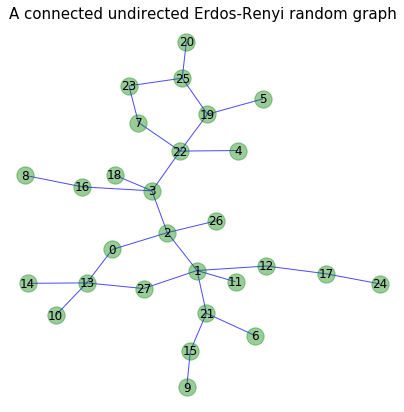

In [35]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="A connected undirected Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==True:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

This disconnected undirected Erdos-Renyi random graph is a disconnected graph and it has 5 connected components
[[1, 3, 4, 5, 7, 9, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29], [6, 8, 11, 15, 23], [13, 30], [2], [0]]
Component 1 with 22 nodes: [1, 3, 4, 5, 7, 9, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
Component 2 with 5 nodes: [6, 8, 11, 15, 23]
Component 3 with 2 nodes: [13, 30]
Component 4 with 1 nodes: [2]
Component 5 with 1 nodes: [0]
The largest connected component of this graph has 22 nodes and 30 edges


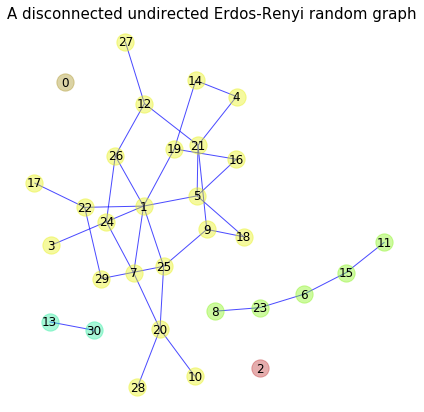

In [36]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="disconnected undirected Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_connected_components(G)>4:
        break

if nx.is_connected(G)==True:
    print("This %s is a connected graph" %name)
else:
    print("This %s is a disconnected graph and it has %i connected components" %(name,nx.number_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    print(lc)
    for i,c in enumerate(lc): 
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

#### Directed Graphs

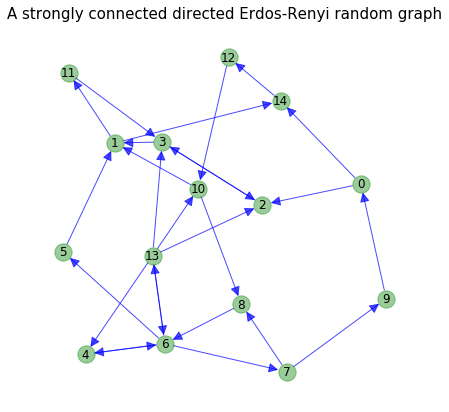

In [37]:
nodes=random.randint(10,21)
p=random.uniform(0.05,0.08)

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_strongly_connected(G)==True:
        break

name="A strongly connected directed Erdos-Renyi random graph" #\n with diameter %i" %nx.diameter(G)

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

In [38]:
nx.diameter(G)

10

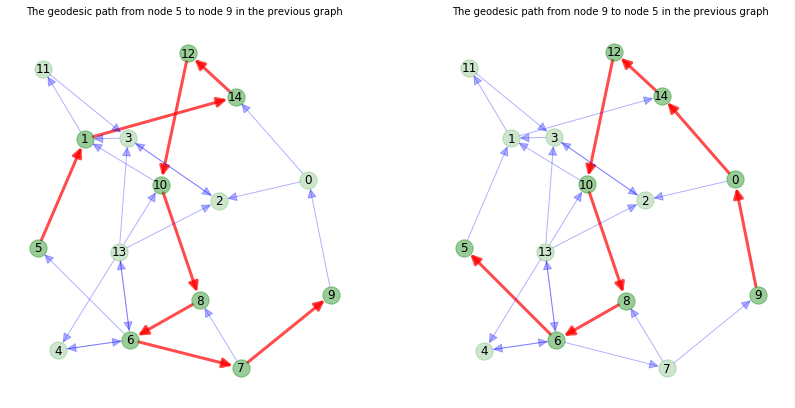

In [40]:
threshold=4 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>threshold:
        break
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph"  %(source,target)
plt.title(name,fontsize=10);

plt.subplot(122)
gp=nx.dijkstra_path(G, source=target, target=source)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph" %(target,source)
plt.title(name,fontsize=10);

This strongly disconnected directed Erdos-Renyi random graph is a strongly disconnected graph and it has 6 strongly connected components
Component 1 with 17 nodes: [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 21]
Component 2 with 1 nodes: [20]
Component 3 with 1 nodes: [18]
Component 4 with 1 nodes: [10]
Component 5 with 1 nodes: [7]
Component 6 with 1 nodes: [0]
The largest connected component of this graph has 17 nodes and 30 edges


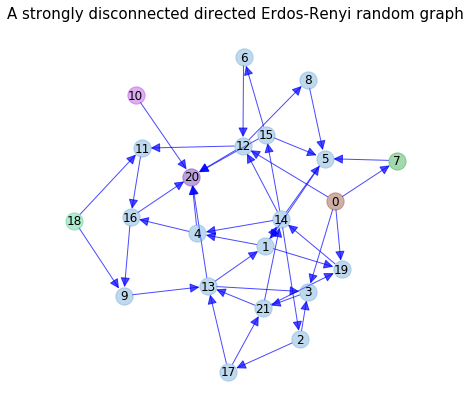

In [41]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="strongly disconnected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
        break

if nx.is_strongly_connected(G)==True:
    print("This %s is a strongly connected graph" %name)
else:
    print("This %s is a strongly disconnected graph and it has %i strongly connected components" %(name,nx.number_strongly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.strongly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

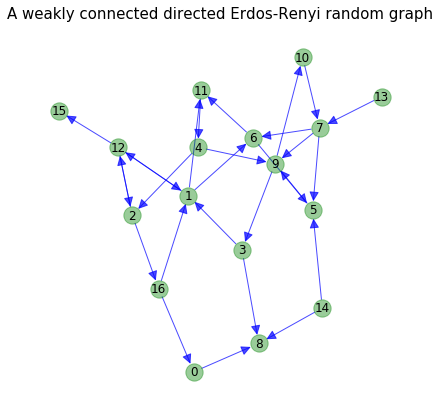

In [42]:
nodes=random.randint(10,21)
p=random.uniform(0.05,0.08)
name="A weakly connected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==True:
        if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
            break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

This weakly connected directed Erdos-Renyi random graph is a strongly disconnected graph and it has 6 strongly connected components
Component 1 with 12 nodes: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 16]
Component 2 with 1 nodes: [15]
Component 3 with 1 nodes: [14]
Component 4 with 1 nodes: [13]
Component 5 with 1 nodes: [8]
Component 6 with 1 nodes: [0]
The largest connected component of this graph has 12 nodes and 21 edges


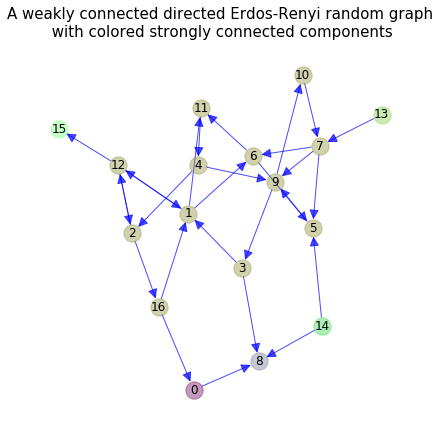

In [43]:
if nx.is_strongly_connected(G)==True:
    print("This %s is a strongly connected graph" %name)
else:
    print("This %s is a strongly disconnected graph and it has %i strongly connected components" %(name.replace("A ",""),nx.number_strongly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.strongly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+"\n"+" with colored strongly connected components",fontsize=15);

This weakly disconnected directed Erdos-Renyi random graph is a weakly disconnected graph and it has 5 weakly connected components
Component 1 with 4 nodes: [0, 11, 3, 1]
Component 2 with 3 nodes: [10, 4, 12]
Component 3 with 3 nodes: [8, 6, 7]
Component 4 with 2 nodes: [9, 2]
Component 5 with 1 nodes: [5]
The largest weakly connected component of this graph has 1 nodes and 0 edges


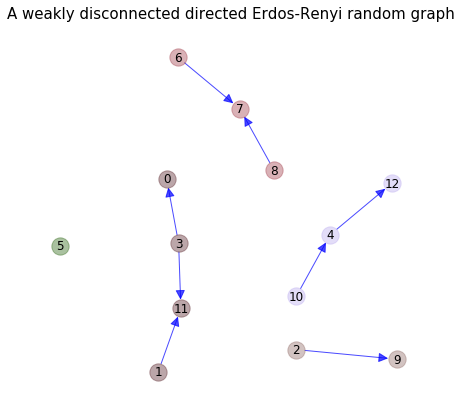

In [44]:
nodes=random.randint(10,21)
p=random.uniform(0.05,0.08)
name="A weakly disconnected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==False and nx.number_weakly_connected_components(G)>3 and len(list(nx.isolates(G)))<3:
#         if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
        break

if nx.is_weakly_connected(G)==True:
    print("This %s is a weakly connected graph" %name.replace("A ",""))
else:
    print("This %s is a weakly disconnected graph and it has %i weakly connected components" %(name.replace("A ",""),nx.number_weakly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.weakly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest weakly connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]                
            
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);